Sintering Trajectories: Description on How Density, Surface Area, and Grain Size Change

G =  Current Average Grain Size  
G_o = Average Initial Grain Size    
Ep = Fractional Porosity (1-f)    
Theta = starting grain size and porosity condition  
Alpha =  diffusivity and surface energy  
t = time  
f = Current Fractional Density    
fo = Original Fractional Density  
N = coefficient often near 1/6 - 1/3  
K = temperature dependent rate parameter  
Y = Change in Length / Original Length   
Css = Contiguity (Grain Boundary/Total Grain Perimeter)  
Kss = grain growth rate parameter solid-solid interface  
Ksv = grain growth rate parameter solid-vapor interface  
q = factor (1.5)

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
from sklearn.metrics import r2_score

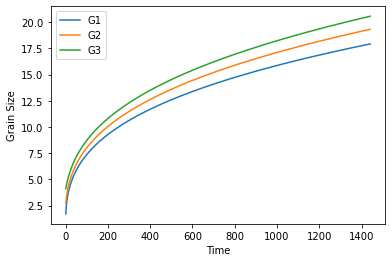

In [35]:
# density definitions
# density will climb from 0.64 to ideally 1 (but always slightly less) (somewhere between 0.85 and 1)
# we will take density from 0.64 to 0.95 (1000 points in between)
# we can add in some gaussian noise here as GN



t = np.arange(1, 1441, dtype=np.float64)

G_original1 = 1
G_original2 = 2.5
G_original3 = 4

K1 = 4
K2 = 5
K3 = 6

G1 = ((G_original1**3)+K1*t)**(1/3)
G2 = ((G_original2**3)+K2*t)**(1/3)
G3 = ((G_original3**3)+K3*t)**(1/3)


#Plot density with GN vs true density

plt.plot(t, G1, label="G1")
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()

plt.plot(t, G2, label="G2")
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()

plt.plot(t, G3, label="G3")
plt.xlabel('Time')
plt.ylabel('Grain Size')
plt.legend()
plt.show()

In [36]:
G2[1439] 

19.32374590695733

In [37]:
G_F = np.zeros((1440,10000))
G_F.shape

(1440, 10000)

In [85]:
G_F = np.zeros((1440,10000))
KE1 = np.zeros(30)
KE2 = np.zeros(30)
KE3 = np.zeros(30)
KE4 = np.zeros(30)

K = 5
G_o = 2.5
G = ((G_o**3)+K*t)**(1/3)

for j in range(1,30):
    for i in range(1440):
        mu = 0
        sigma = j*0.1
        MP = 10000
        GN = np.random.normal(mu, sigma, MP)   
        G_F[i] = G[i]+GN

    tt = np.expand_dims(t, axis=1)   
    K_measured = (G_F**3 - G_F[0]**3)/tt
    K_E1 = np.abs((K-K_measured)/K)*100
    K_E1_mean = np.mean(K_E1, axis=1)
    
    
    K_m2 = np.array([K_measured[720], K_measured[1439]])
    K_m2a = np.mean(K_m2, axis=0)
    K_E2 = np.abs((K-K_m2a)/K)*100
    K_E2a = np.mean(K_E2)
    KE2[j] = K_E2a
    
    K_m3 = np.array([K_measured[480], K_measured[960], K_measured[1439]])
    K_m3a = np.mean(K_m3, axis=0)
    K_E3 = np.abs((K-K_m3a)/K)*100
    K_E3a = np.mean(K_E3)
    KE3[j] = K_E3a
    
    K_m4 = np.array([K_measured[360], K_measured[720], K_measured[1080], K_measured[1439]])
    K_m4a = np.mean(K_m4, axis=0)
    K_E4 = np.abs((K-K_m4a)/K)*100
    K_E4a = np.mean(K_E4)
    KE4[j] = K_E4a
    
    
    K_E1_mean = np.mean(K_E1, axis=1)
    KE1[j] = K_E1_mean[1439]

In [86]:
KE4

array([ 0.        ,  0.78863837,  1.5972978 ,  2.33546702,  3.12434056,
        3.94171597,  4.70030573,  5.51402705,  6.30937232,  7.14033308,
        7.8873011 ,  8.75389627,  9.39709503, 10.34119351, 11.13345258,
       12.19672796, 12.89317249, 13.79805213, 14.53822663, 15.46275552,
       16.22702182, 17.11439455, 18.41217717, 19.13148882, 20.13197234,
       21.05246297, 21.91725049, 22.83332453, 23.84702119, 25.29440256])

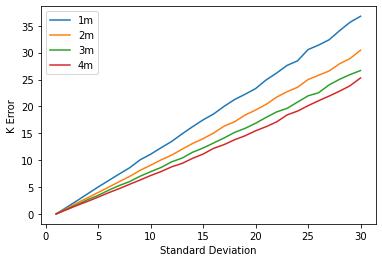

In [88]:
std = np.arange(1, 31)

plt.plot(std, KE1, label="1m")
plt.xlabel('Standard Deviation')
plt.ylabel('K Error')
plt.legend()

plt.plot(std, KE2, label="2m")
plt.xlabel('Standard Deviation')
plt.ylabel('K Error')
plt.legend()

plt.plot(std, KE3, label="3m")
plt.xlabel('Standard Deviation')
plt.ylabel('K Error')
plt.legend()

plt.plot(std, KE4, label="4m")
plt.xlabel('Standard Deviation')
plt.ylabel('K Error')
plt.legend()
plt.show()


In [89]:
import pandas as pd 
import csv

# assign header columns
header = ['A Mean Error', 'B Mean Error', 'A StDev', 'B StDev']

Full = np.stack((KE1, KE2, KE3, KE4), axis = 1)

Full_pd = np.asarray(Full)

pd.DataFrame(Full_pd).to_csv('sample1.csv')